In [2]:
import pandas as pd
import numpy as np
import os

from scipy import stats

In [3]:
cwd = os.getcwd()

# data_path = "F:\\Academic\\Research\\myData\\processed_dataset"

data_path = "D:\\Research\\data\\processed_dataset" #lab

# tissue_type = 'liver'
# tissue_type = 'pancreas'
# tissue_type = 'kidney'
tissue_type = 'heart'

df_mRNA = pd.read_csv(f'{data_path}\\{tissue_type}\\mRNA_bulk.csv')
df_mRNA = df_mRNA.drop('Unnamed: 0',axis=1)

df_miRNA = pd.read_csv(f'{data_path}\\{tissue_type}\\miRNA_bulk.csv')
df_miRNA = df_miRNA.drop('Unnamed: 0',axis=1)

df_miRNA

,gene_name,B12.MAA000398.3_9_M.1.1,D16.MAA000398.3_9_M.1.1,F10.MAA000398.3_9_M.1.1,L17.MAA000398.3_9_M.1.1,N18.MAA000398.3_9_M.1.1,H15.MAA000398.3_9_M.1.1,J14.MAA000398.3_9_M.1.1,B14.MAA000398.3_9_M.1.1,D17.MAA000398.3_9_M.1.1,...,D5.MAA100097.3_39_F.1.1,A8.MAA100097.3_39_F.1.1,D7.MAA100097.3_39_F.1.1,F2.MAA100097.3_38_F.1.1,F3.MAA100097.3_38_F.1.1,A7.MAA100097.3_39_F.1.1,D6.MAA100097.3_39_F.1.1,F1.MAA100097.3_38_F.1.1,A9.MAA100097.3_39_F.1.1,D8.MAA100097.3_39_F.1.1
0,Mir100,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Mir101b,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Mir103-2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Mir105,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Mir107,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,Mirlet7d,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
220,Mirlet7e,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
221,Mirlet7f-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
222,Mirlet7g,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
temp_allgenes = df_mRNA.drop(df_mRNA.index[(df_mRNA.iloc[:,1:].sum(axis = 1) < 100)])
temp_allgenes = temp_allgenes.set_index('gene_name').T

temp_allgenes

gene_name,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610009B14Rik,0610009B22Rik,0610009D07Rik,...,Zwint,Zxda,Zxdb,Zxdc,Zyg11a,Zyg11b,Zyx,Zzef1,Zzz3,l7Rn6
B12.MAA000398.3_9_M.1.1,0,272,93,65,1,0,0,0,0,141,...,0,2,8,0,0,0,68,1,0,17
D16.MAA000398.3_9_M.1.1,0,21,95,0,0,0,0,0,34,0,...,0,0,0,0,0,0,389,3,6,41
F10.MAA000398.3_9_M.1.1,0,54,43,0,0,0,0,0,0,37,...,66,0,0,41,0,28,45,0,31,19
L17.MAA000398.3_9_M.1.1,0,21,0,27,0,27,0,0,0,9,...,84,0,0,0,0,0,50,38,0,11
N18.MAA000398.3_9_M.1.1,0,73,82,66,0,0,58,0,68,0,...,0,0,0,22,0,14,97,99,124,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A7.MAA100097.3_39_F.1.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
D6.MAA100097.3_39_F.1.1,0,147,116,0,0,0,0,0,157,106,...,93,0,0,113,0,123,0,0,193,23
F1.MAA100097.3_38_F.1.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A9.MAA100097.3_39_F.1.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [5]:
corr_tally = pd.DataFrame(columns=['tally'])

for col in temp_allgenes:
    corr_tally.loc[col] = [0]

In [6]:
temp_mir = df_miRNA.drop(df_miRNA.index[(df_miRNA.iloc[:,1:].sum(axis = 1) < 90)])
temp_mir = temp_mir.set_index('gene_name').T

# corr_df = pd.DataFrame()

all_corr = []


corr_thres = 0.3
# miCol = 3
# temp_mir.iloc[:,miCol]

for miCol in range(temp_mir.shape[1]):
    for col in temp_allgenes:
        r, p = stats.pearsonr(temp_mir.iloc[:,miCol], temp_allgenes[col])
        
        all_corr.append(r)

        if(r>corr_thres):
            corr_tally.loc[col] = corr_tally.loc[col] + 1

        # corr_df.iloc[col, miCol] = round(r, 3)

# corr_df[(corr_df.r>0.3)]

In [7]:
high_corr_genes = corr_tally.sort_values('tally', ascending=False)[0:2500]

In [8]:
# r, p = stats.pearsonr(temp_mir126, temp_allgenes.iloc[:,1])


corr_tally[corr_tally.tally>0]


,tally
1110002B05Rik,1
1110003E01Rik,1
1110050K14Rik,1
1190002F15Rik,1
1190002H23Rik,1
...,...
Zfp473,2
Zfp551,2
Zfp772,1
Zmat4,1


In [9]:
high_corr_genes.sort_index().index

Index(['1110002B05Rik', '1110003E01Rik', '1110050K14Rik', '1190002F15Rik',
       '1190002H23Rik', '1190003J15Rik', '1500032L24Rik', '1700003E16Rik',
       '1700012A16Rik', '1700013N18Rik',
       ...
       'Zfp108', 'Zfp114', 'Zfp36l1', 'Zfp389', 'Zfp459', 'Zfp473', 'Zfp551',
       'Zfp772', 'Zmat4', 'Zyx'],
      dtype='object', length=2500)

In [10]:
final_mRNA_gene_dataset = temp_allgenes[high_corr_genes.sort_index().index]
final_mRNA_gene_dataset.to_csv(f'{data_path}\\{tissue_type}\\highly_expressed_2500_genes.csv')



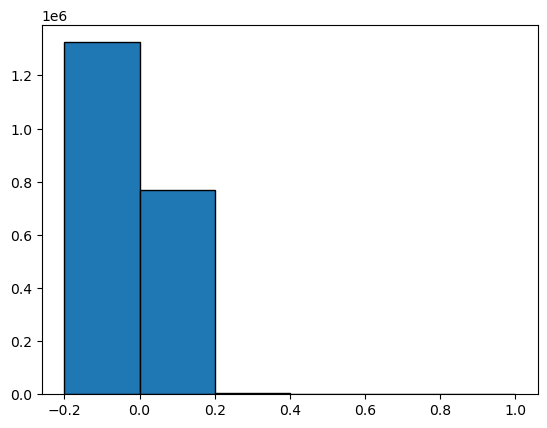

In [11]:
# temp_mir126 = df_miRNA.set_index('gene_name').T
# temp_mir126 = temp_mir126.Mir126



all_corr


import numpy as np; np.random.seed(0)
import matplotlib.pyplot as plt
import pandas as pd


bins= [-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1]
plt.hist(all_corr, bins=bins, edgecolor="k")
plt.xticks(bins)

plt.show()

In [12]:
# corr_df = pd.DataFrame(columns=['r', 'p'])

# for col in temp_allgenes:
#     r, p = stats.pearsonr(temp_mir126, temp_allgenes[col])
#     corr_df.loc[col] = [round(r, 3), round(p, 3)]

In [13]:
high_corr_genes

,tally
Mfsd6l,4
Slc39a4,4
Rpl9,3
Rplp2,3
Rps14,3
...,...
Ptafr,0
Ptar1,0
Ptbp1,0
Ptbp2,0


In [90]:
# corr_df[(corr_df.p>0.3)]